### Bollinger Bands (BB)

In [145]:
merged_df['BB_upper'] = merged_df['SMA_50'] + (merged_df['Close'].rolling(window=50).std() * 2)
merged_df['BB_lower'] = merged_df['SMA_50'] - (merged_df['Close'].rolling(window=50).std() * 2)

### Average True Range (ATR) 

In [146]:
merged_df['ATR'] = merged_df['High'] - merged_df['Low']
merged_df['ATR'] = merged_df['ATR'].rolling(window=14).mean()

## Indicateurs de Momentum

### Relative Strength Index (RSI) 

In [147]:
delta = merged_df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
merged_df['RSI'] = 100 - (100 / (1 + rs))

## Indicateurs de Volume

### Volume Weighted Average Price (VWAP) 

In [148]:
merged_df['VWAP'] = (merged_df['Close'] * merged_df['Volume']).cumsum() / merged_df['Volume'].cumsum()

### On Balance Volume (OBV) 

In [149]:
import numpy as np
merged_df['OBV'] = (merged_df['Volume'] * np.sign(merged_df['Close'].diff())).cumsum()

In [150]:
merged_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Crypto',
       'Volatility', 'Return', 'Amplitude', 'Price_change', 'Volatility_ratio',
       'High_low_spread', 'SMA_7', 'SMA_50', 'EMA_10', 'EMA_50', 'RoC',
       'BB_upper', 'BB_lower', 'ATR', 'RSI', 'VWAP', 'OBV'],
      dtype='object')

## Graphique des séries temporelles

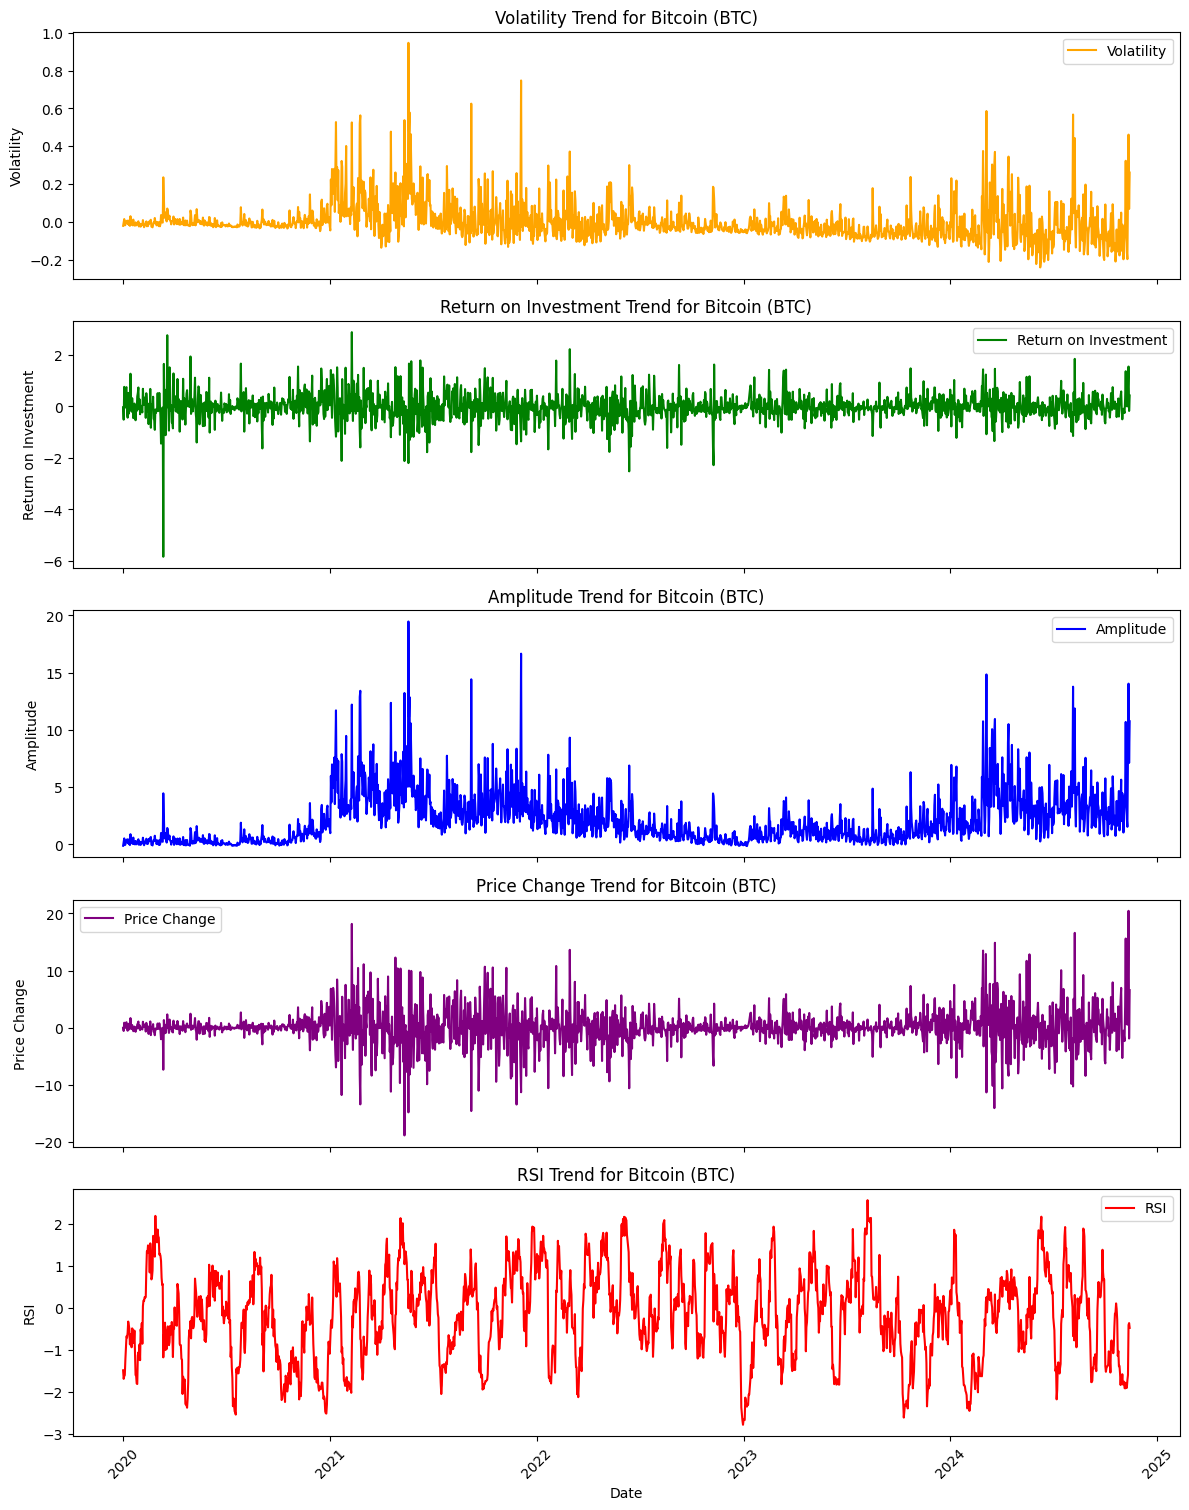

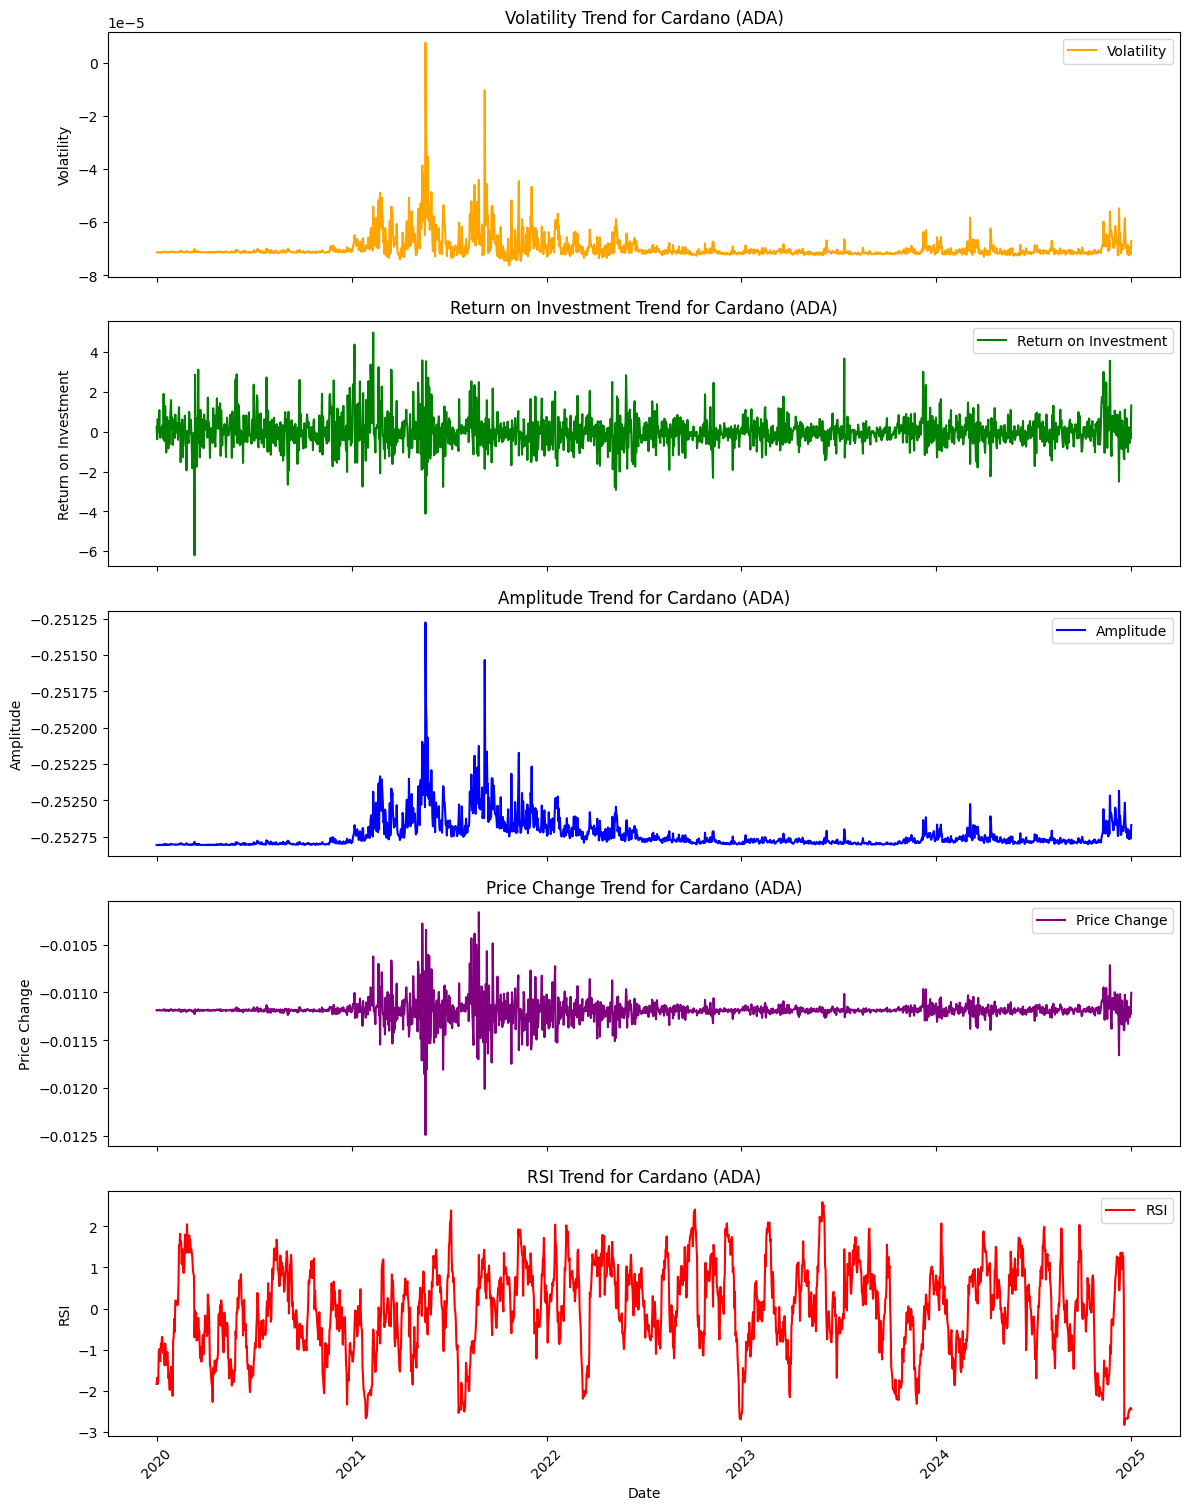

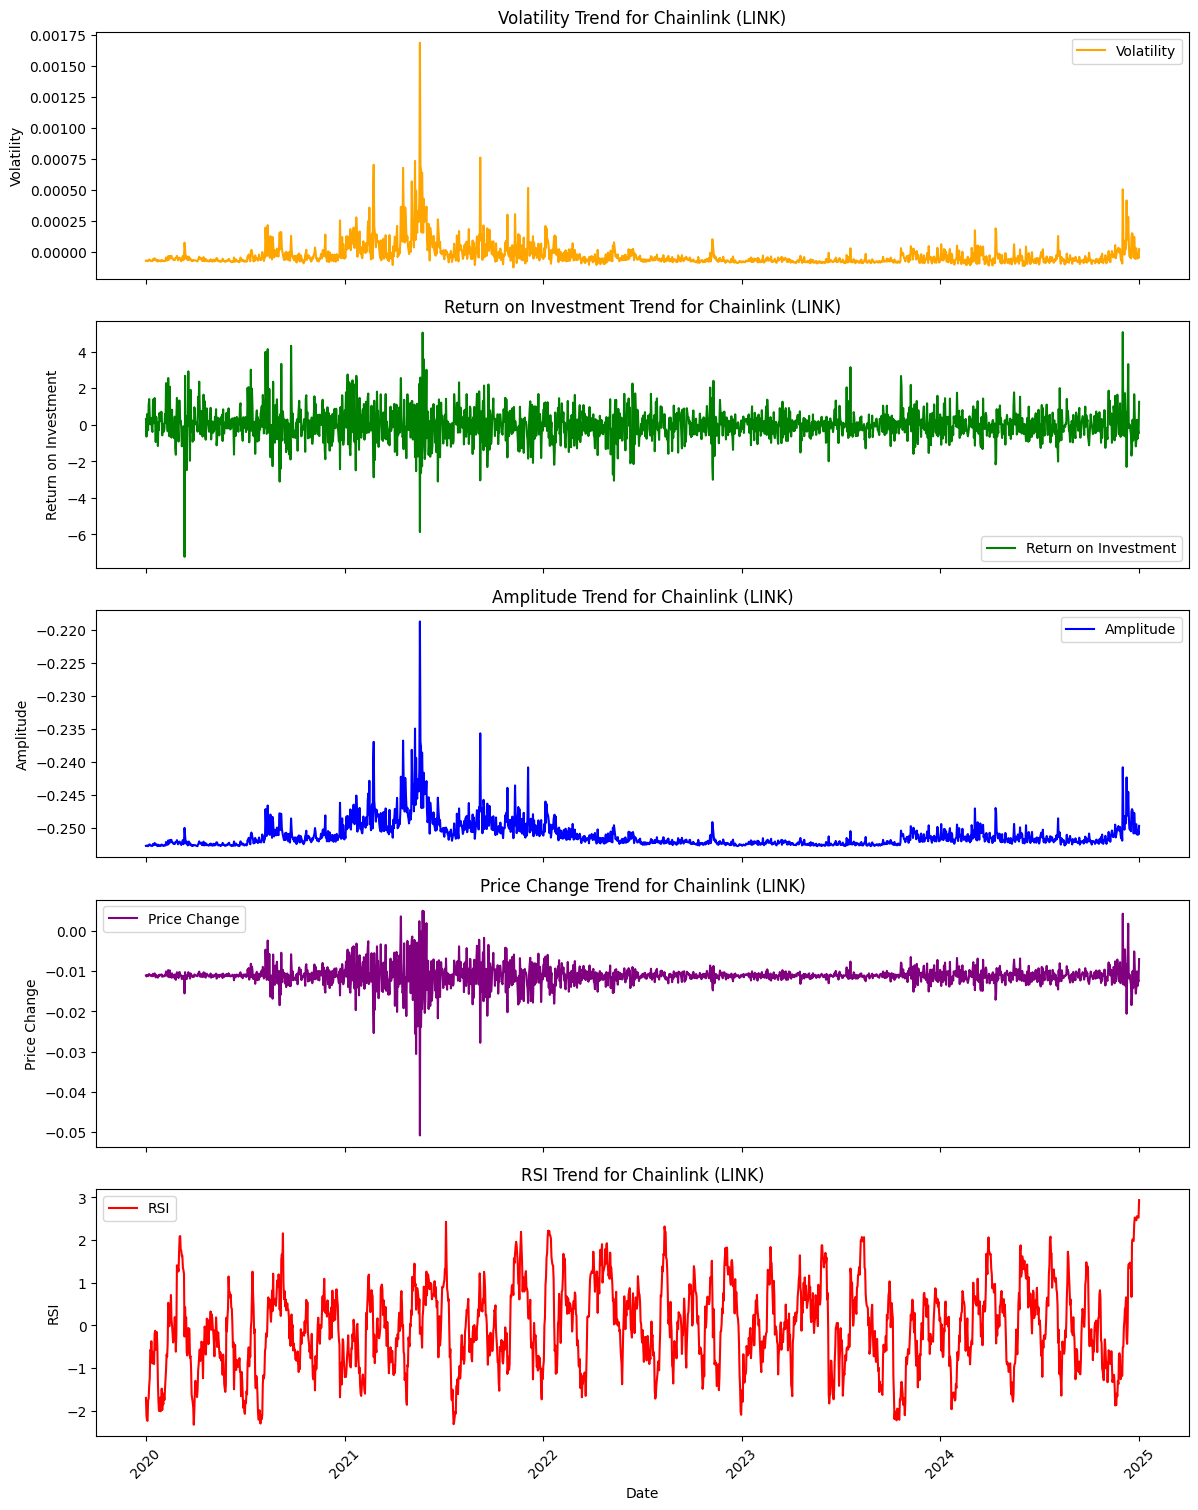

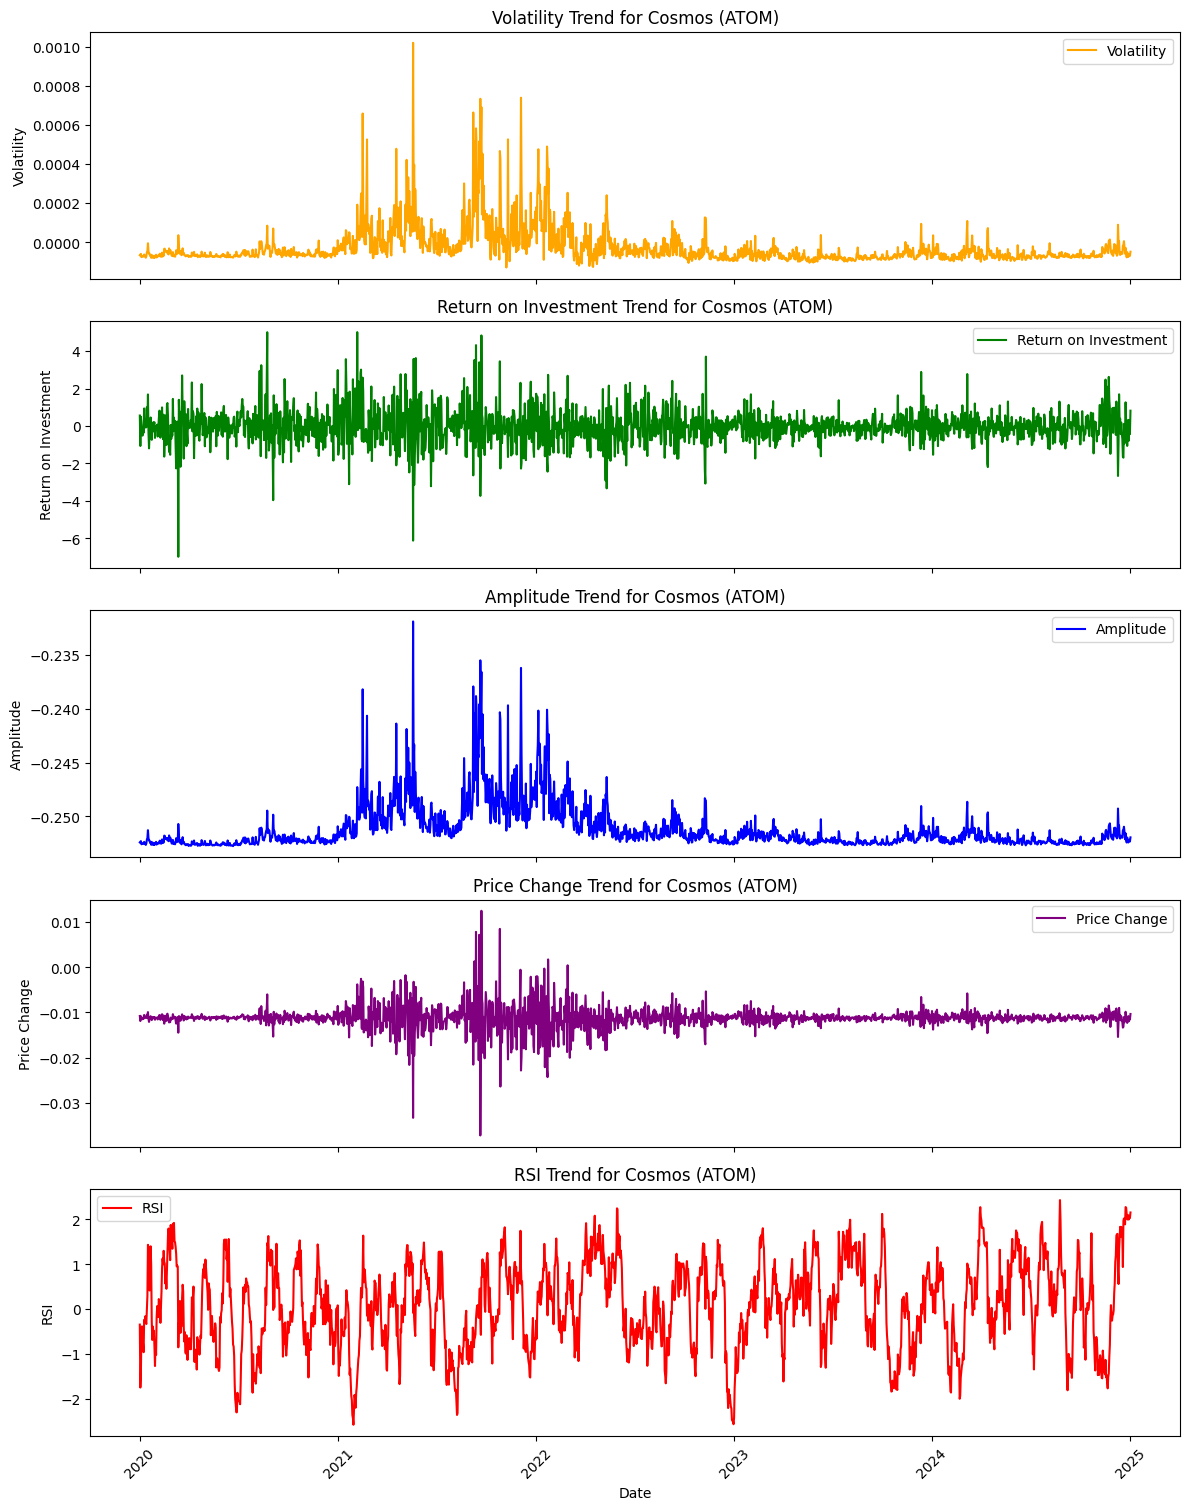

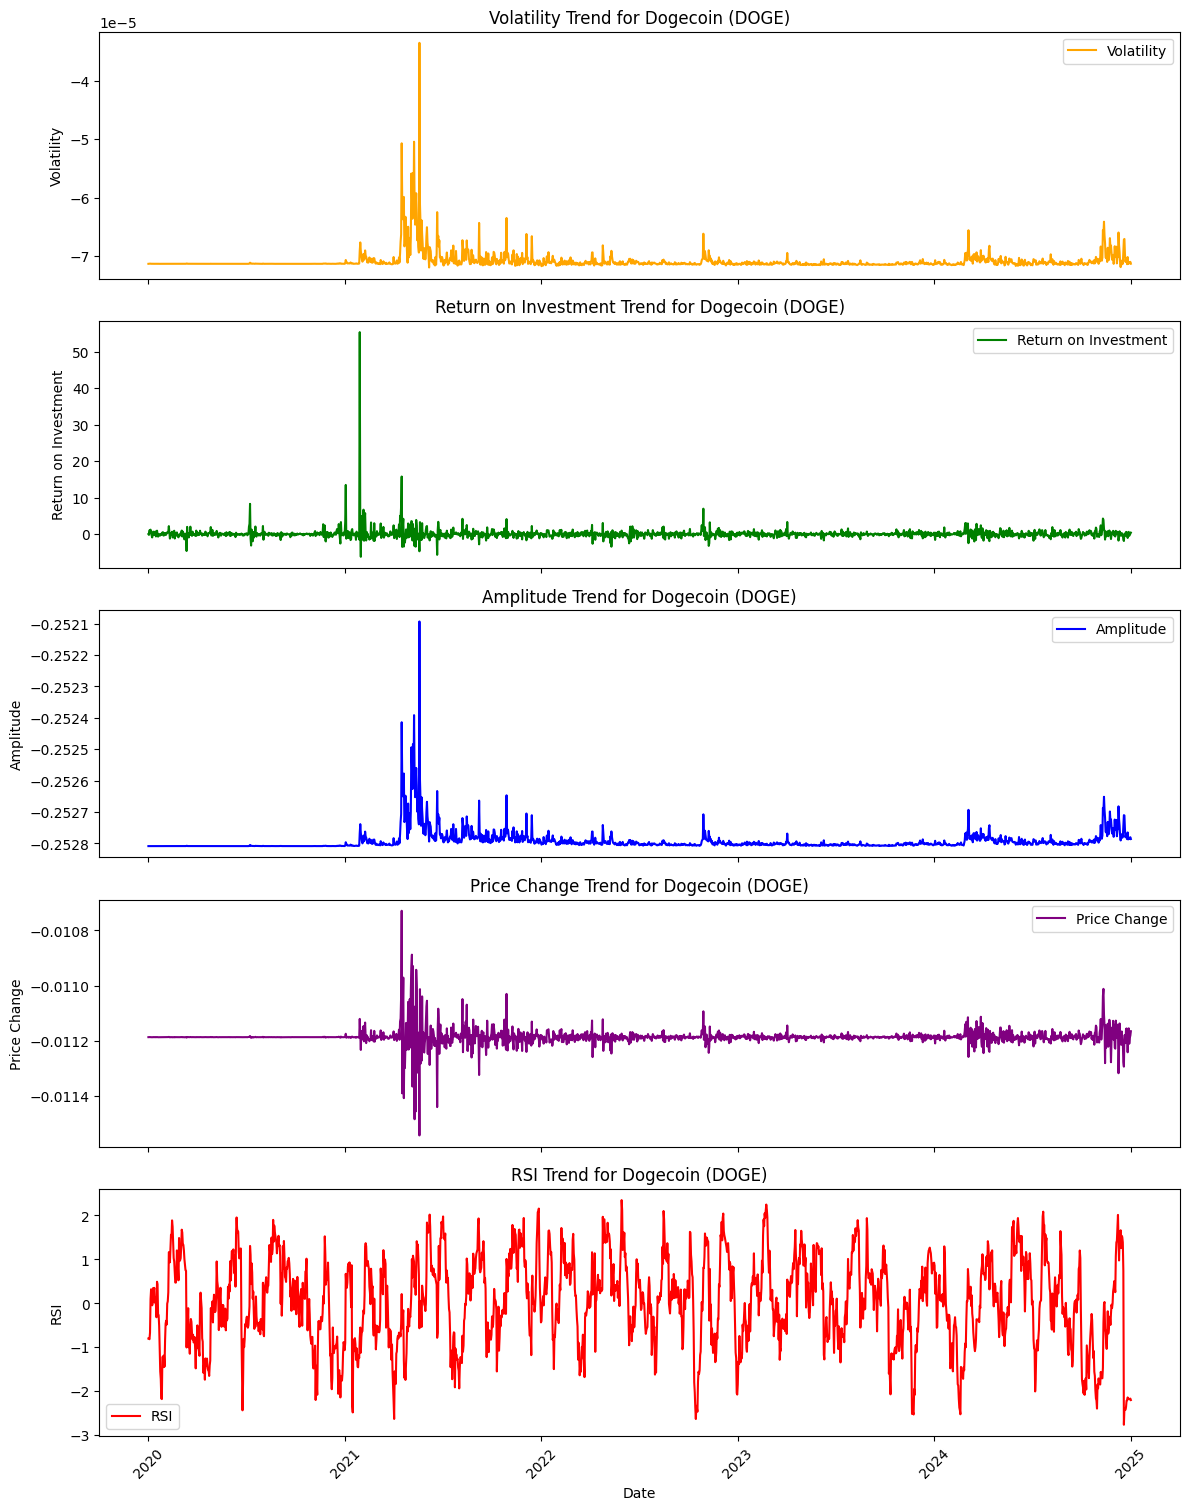

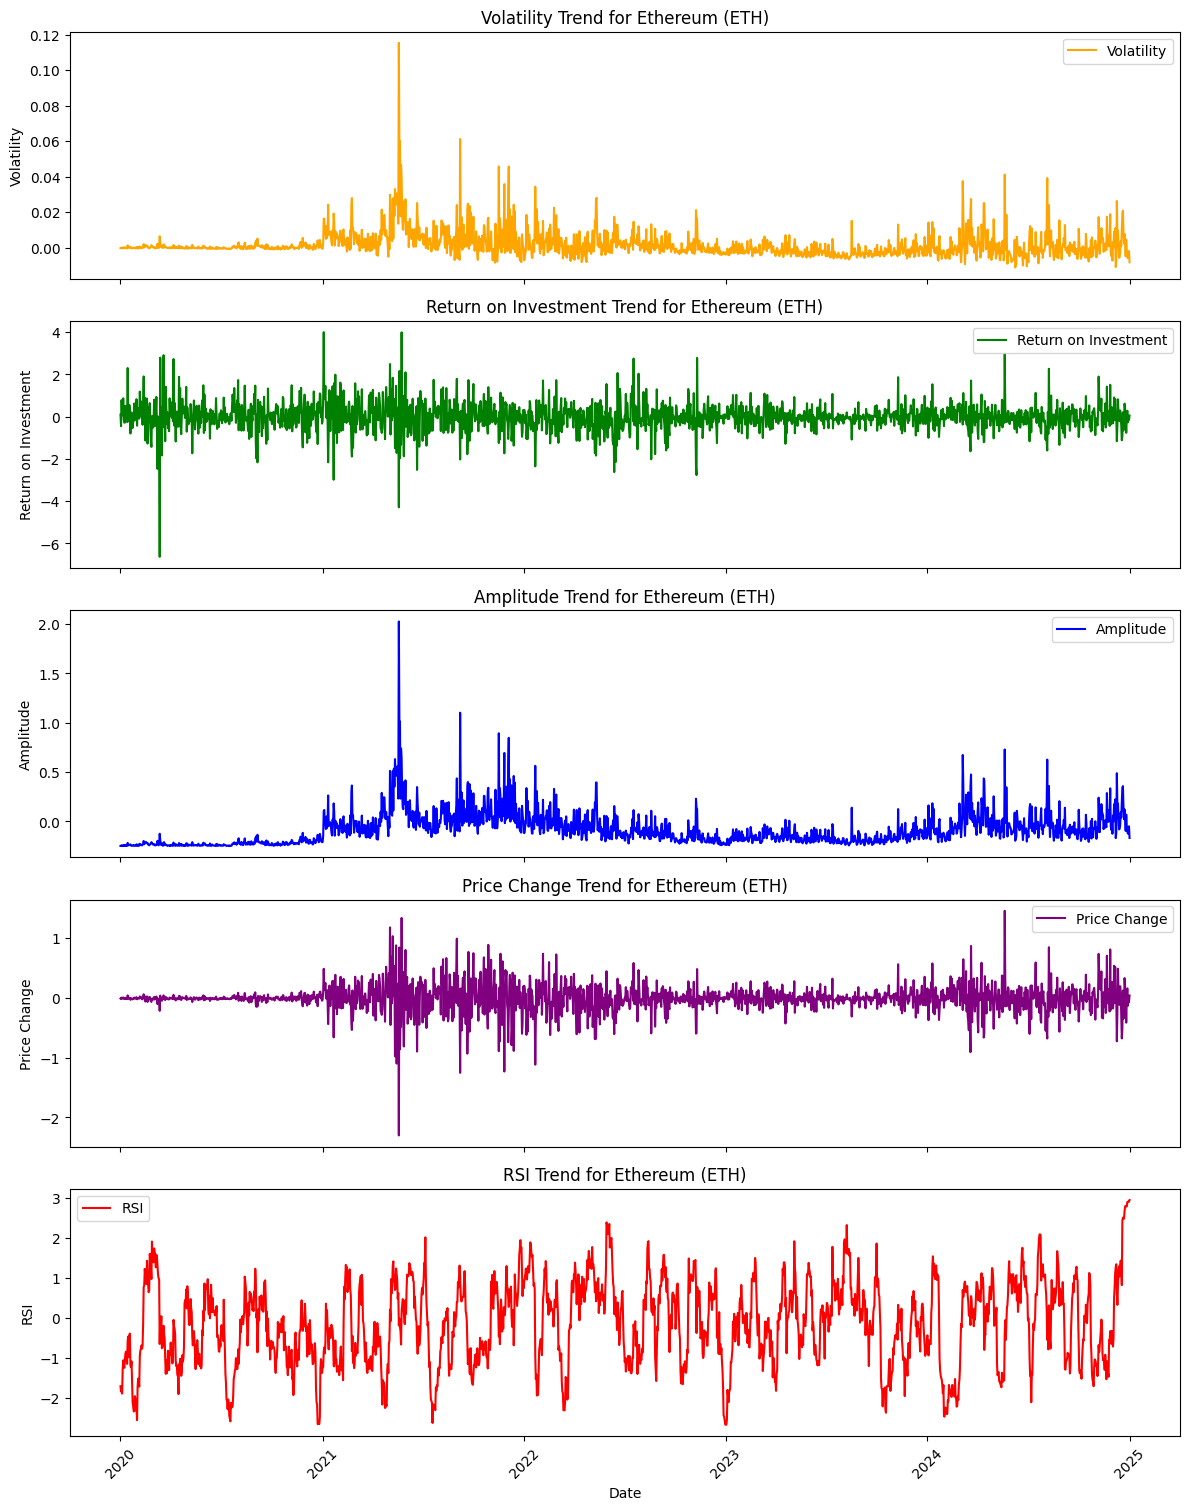

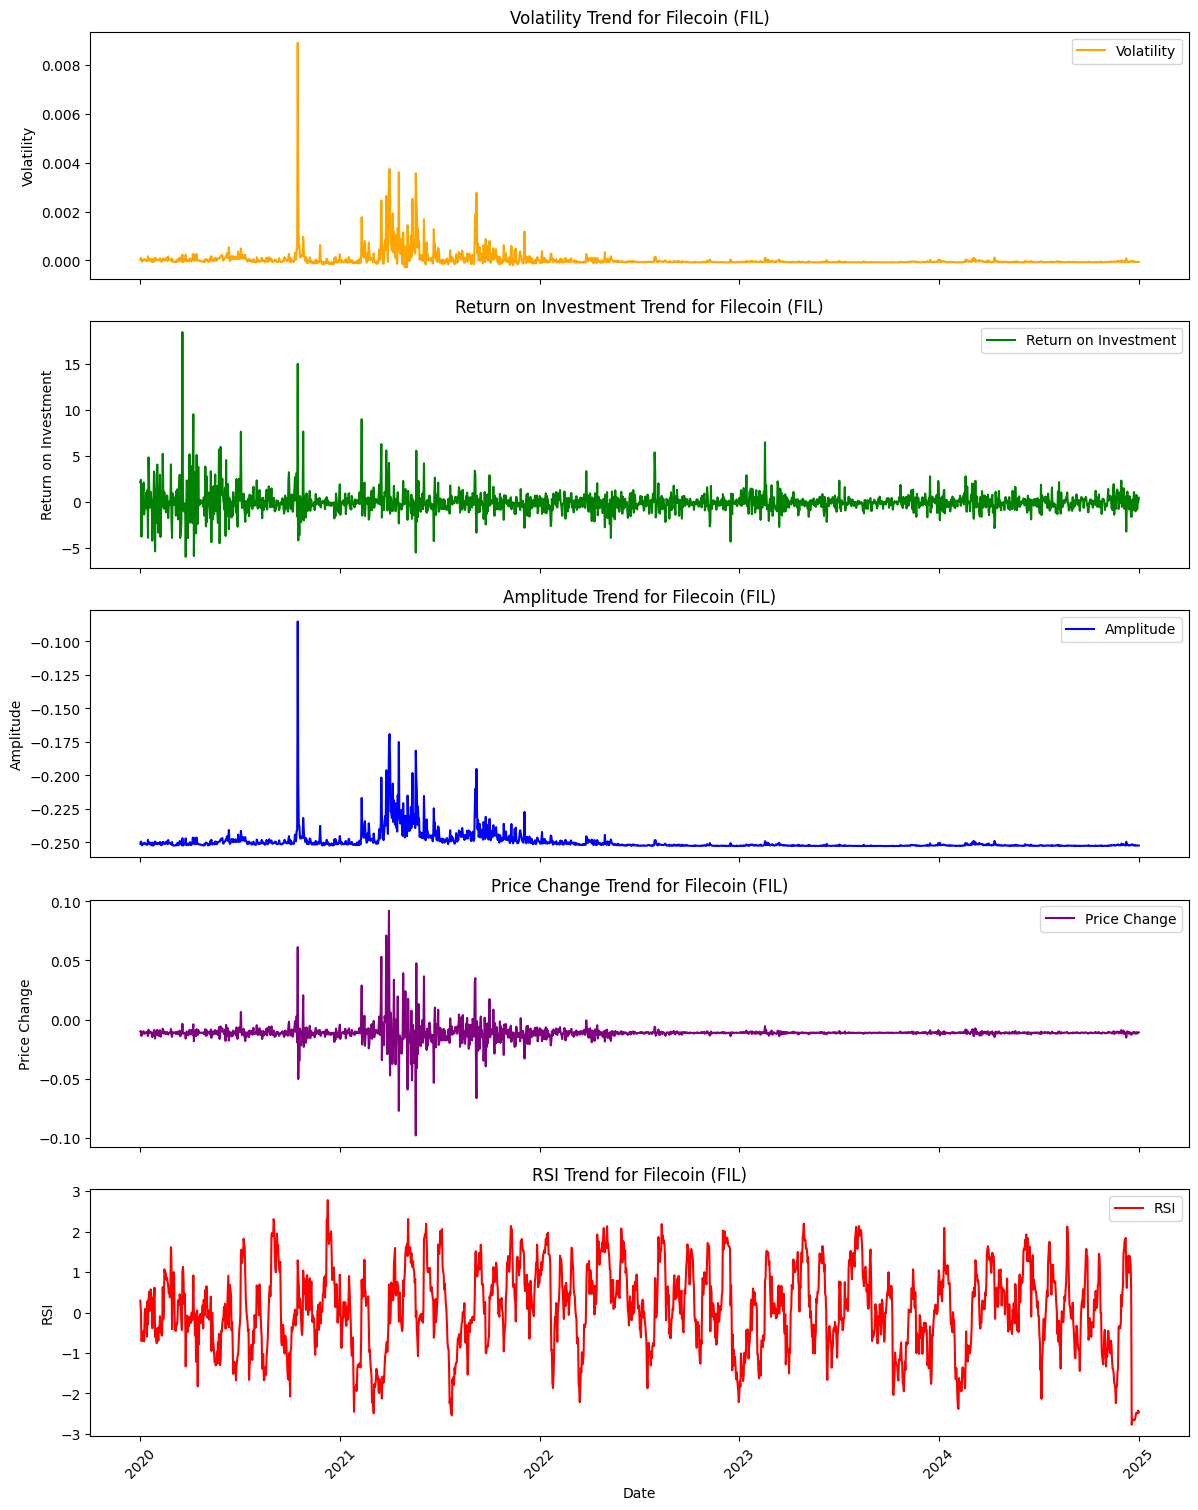

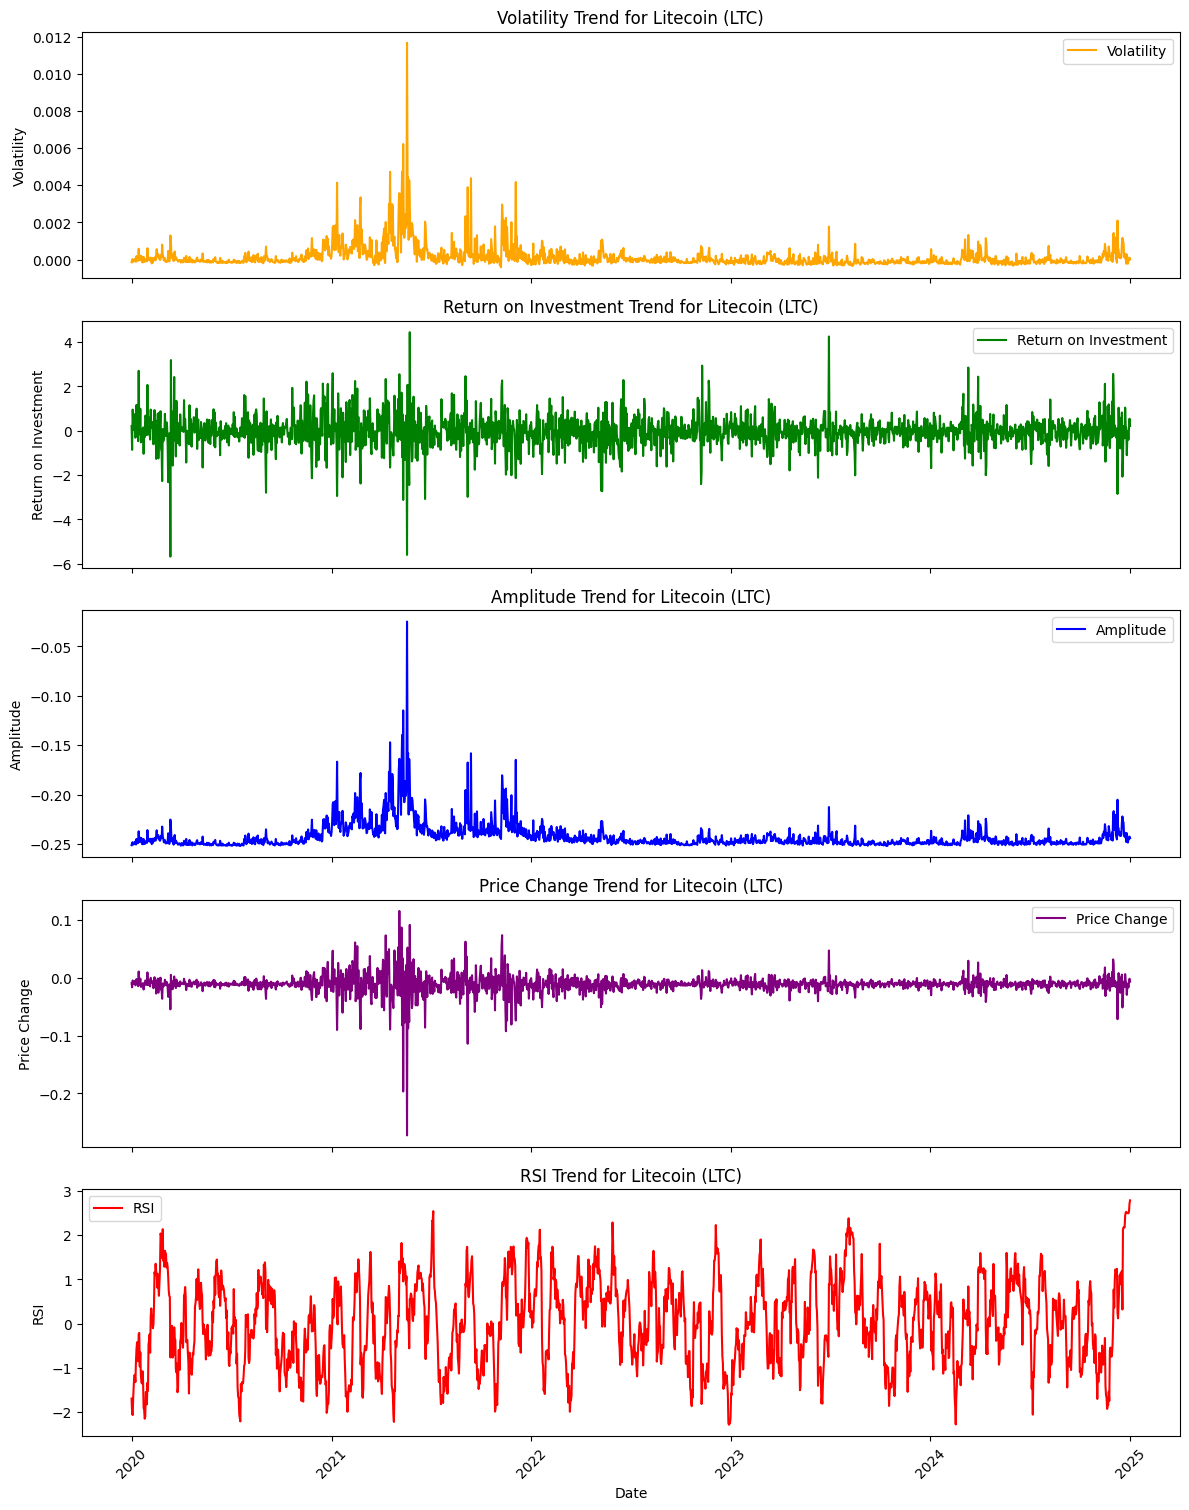

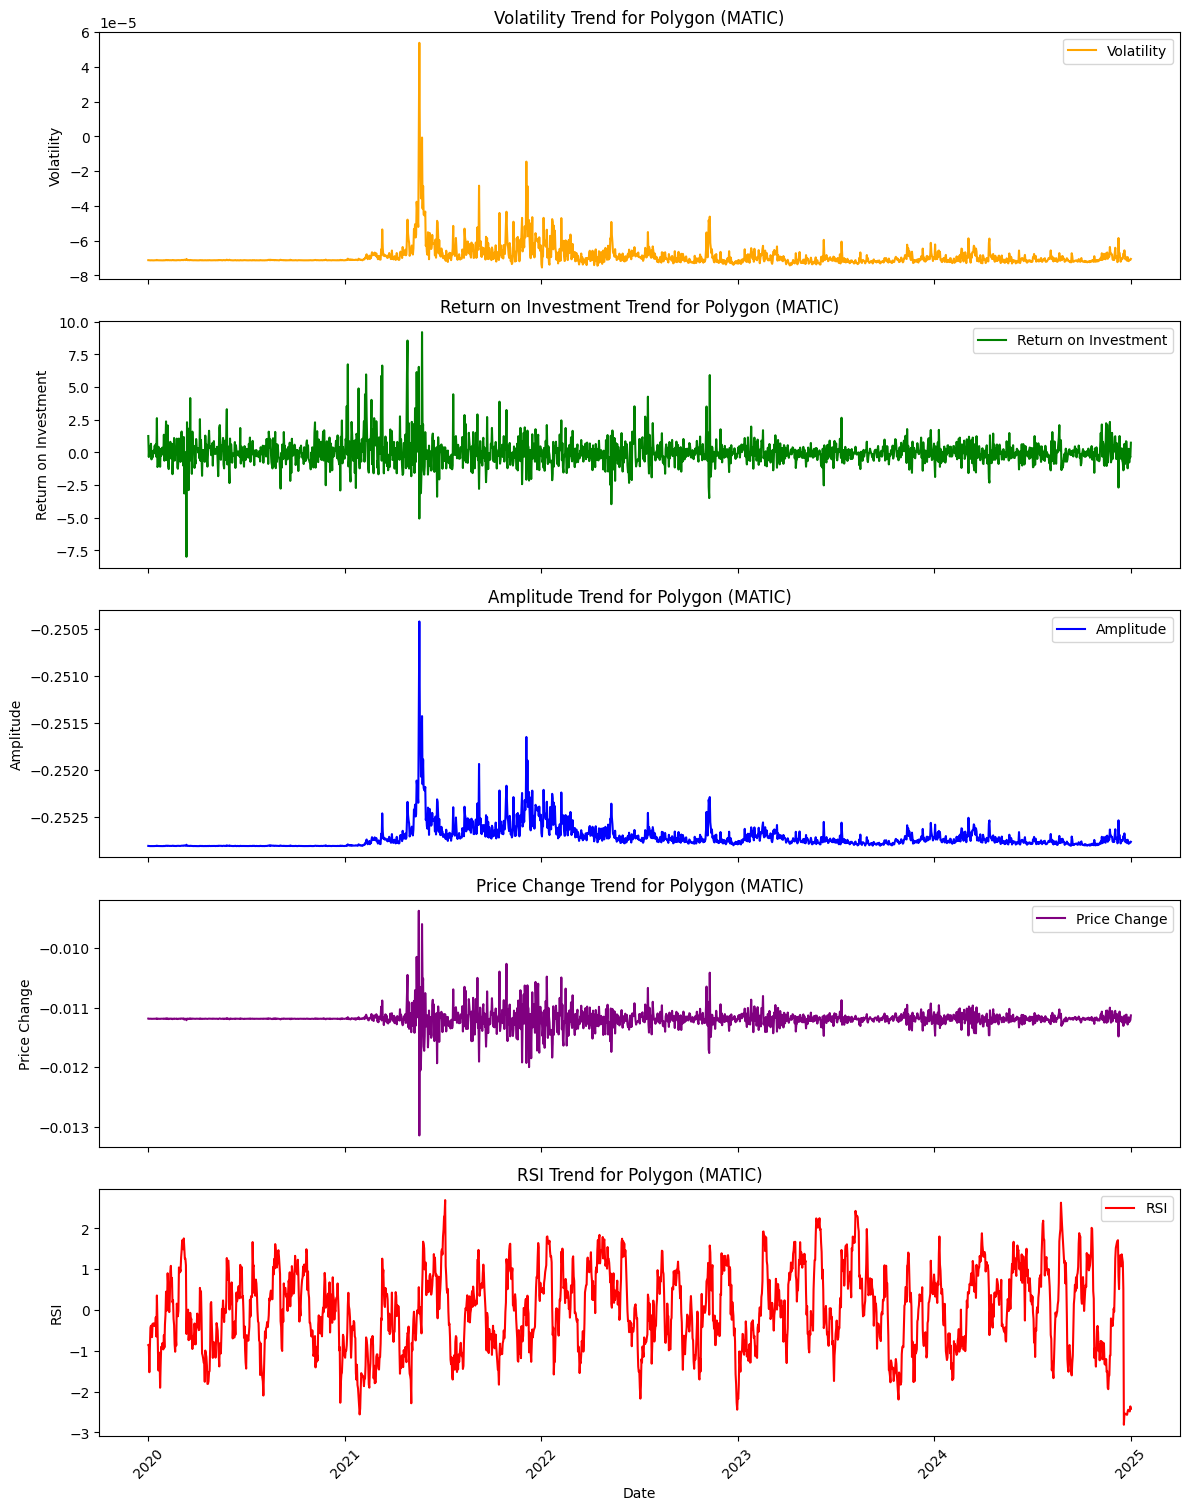

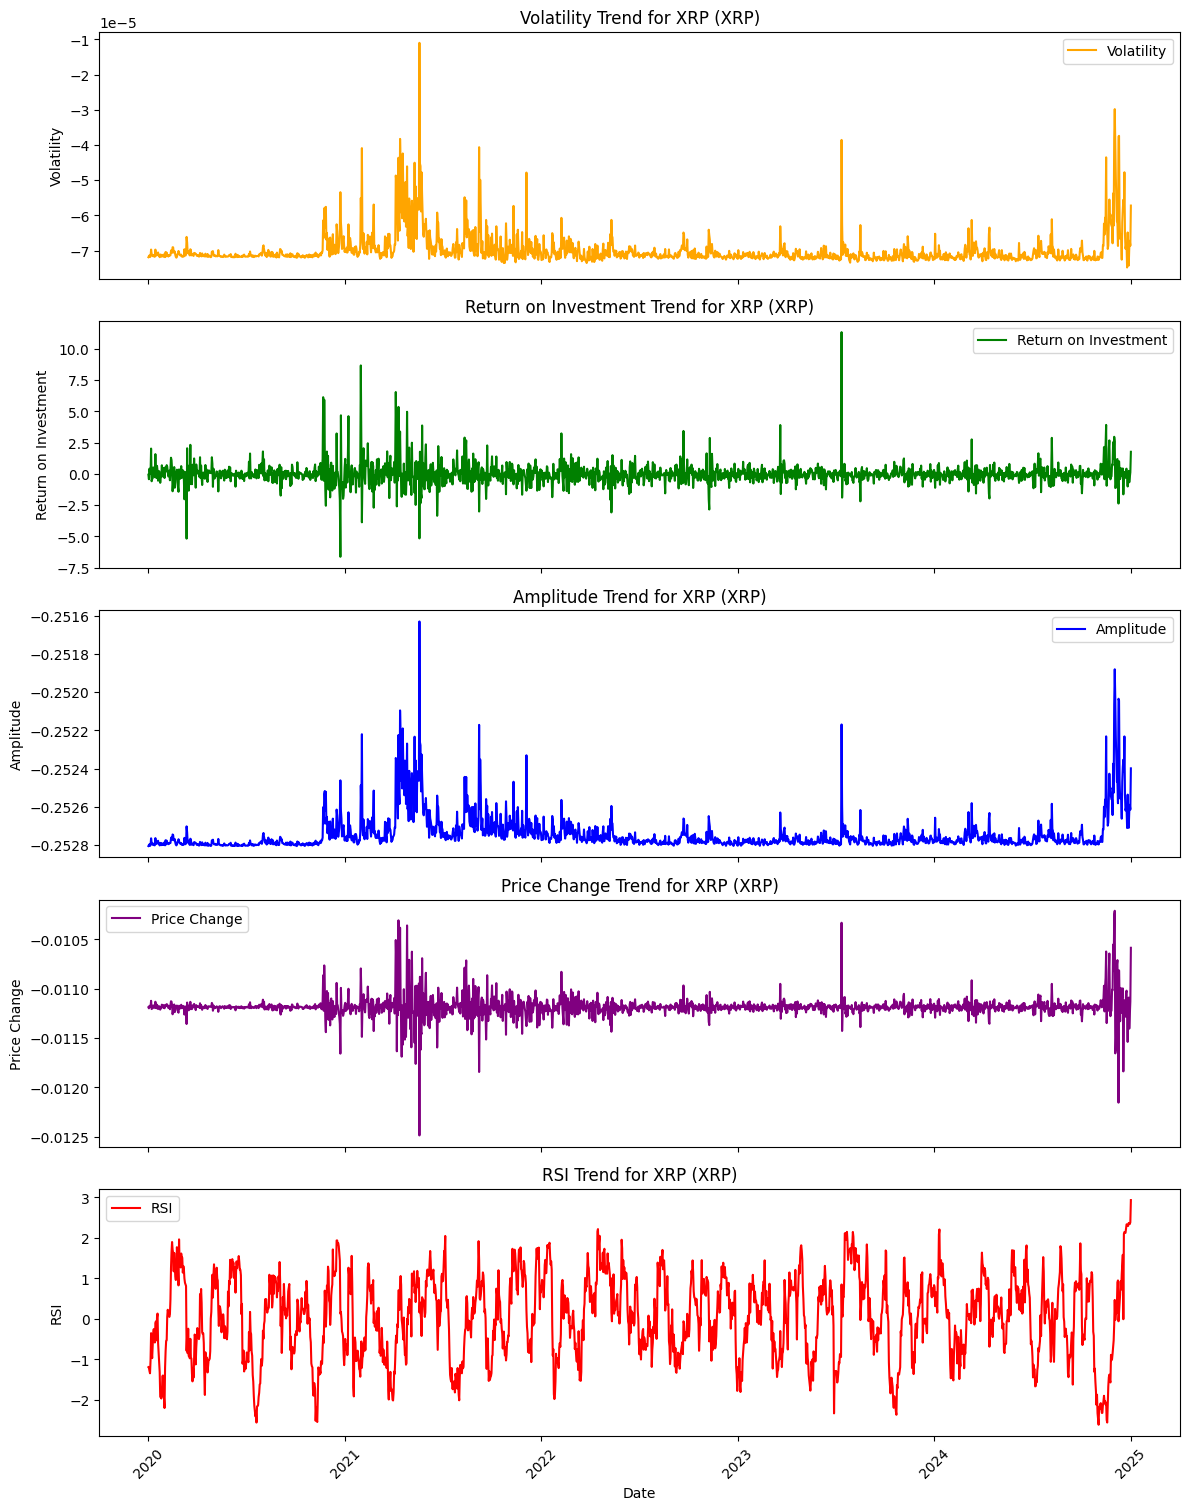

In [196]:
import matplotlib.pyplot as plt

# Function to plot time series trends for cryptocurrencies
def plot_crypto_trends(df, crypto_name):
    # Filter data for the selected cryptocurrency
    crypto_df = df[df['Crypto'] == crypto_name]
    
    # Create figure and axes for subplots
    fig, axes = plt.subplots(5, 1, figsize=(12, 15), sharex=True)

    # Volatility trend over time
    axes[0].plot(crypto_df['Date'], crypto_df['Volatility'], label='Volatility', color='orange')
    axes[0].set_title(f'Volatility Trend for {crypto_name}')
    axes[0].set_ylabel('Volatility')
    axes[0].legend()

    # Return on investment (Return) trend over time
    axes[1].plot(crypto_df['Date'], crypto_df['Return'], label='Return on Investment', color='green')
    axes[1].set_title(f'Return on Investment Trend for {crypto_name}')
    axes[1].set_ylabel('Return on Investment')
    axes[1].legend()

    # Amplitude trend over time
    axes[2].plot(crypto_df['Date'], crypto_df['Amplitude'], label='Amplitude', color='blue')
    axes[2].set_title(f'Amplitude Trend for {crypto_name}')
    axes[2].set_ylabel('Amplitude')
    axes[2].legend()

    # Price change trend over time
    axes[3].plot(crypto_df['Date'], crypto_df['Price_change'], label='Price Change', color='purple')
    axes[3].set_title(f'Price Change Trend for {crypto_name}')
    axes[3].set_ylabel('Price Change')
    axes[3].legend()

    # RSI trend over time
    axes[4].plot(crypto_df['Date'], crypto_df['RSI'], label='RSI', color='red')
    axes[4].set_title(f'RSI Trend for {crypto_name}')
    axes[4].set_xlabel('Date')
    axes[4].set_ylabel('RSI')
    axes[4].legend()

    # Display plots
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()

# Get unique cryptocurrencies from the dataset
crypto_names = merged_df['Crypto'].unique()

# Function to analyze and plot trends for all cryptocurrencies
def plot_crypto_trends_for_all(df, crypto_names):
    for crypto_name in crypto_names:
        plot_crypto_trends(df, crypto_name)

# Call the function to analyze all cryptocurrencies
plot_crypto_trends_for_all(merged_df, crypto_names)



## Normalisation 

### Variables financières

In [151]:
merged_df.head()

Date      Open      High       Low     Close  Adj Close  \
Crypto                                                                          
Bitcoin (BTC) 0 2025-01-01  93425.10  94929.87  92788.13  94419.76   94419.76   
              1 2024-12-31  92643.25  96090.60  91914.03  93429.20   93429.20   
              2 2024-12-30  93527.20  94903.32  91317.13  92643.21   92643.21   
              3 2024-12-29  95174.05  95174.88  92881.79  93530.23   93530.23   
              4 2024-12-28  94160.19  95525.90  94014.29  95163.93   95163.93   

                       Volume         Crypto  Volatility    Return  ...  \
Crypto                                                              ...   
Bitcoin (BTC) 0  2.451989e+10  Bitcoin (BTC)     2141.74  0.010647  ...   
              1  4.362511e+10  Bitcoin (BTC)     4176.57  0.008484  ...   
              2  5.618800e+10  Bitcoin (BTC)     3586.19 -0.009452  ...   
              3  2.963589e+10  Bitcoin (BTC)     2293.09 -0.017272  ...   
              4  2.410744e+10  Bitcoin (BTC)     1511.61  0.010660  ...   

                 SMA_50        EMA_10        EMA_50  RoC  BB_upper  BB_lower  \
Crypto                                                                         
Bitcoin (BTC) 0     NaN  94419.760000  94419.760000  NaN       NaN       NaN   
              1     NaN  93874.952000  93914.574400  NaN       NaN       NaN   
              2     NaN  93379.799900  93473.724006  NaN       NaN       NaN   
              3     NaN  93429.359916  93488.709165  NaN       NaN       NaN   
              4     NaN  93927.307811  93851.081837  NaN       NaN       NaN   

                 ATR  RSI          VWAP           OBV  
Crypto                                                 
Bitcoin (BTC) 0  NaN  NaN  94419.760000           NaN  
              1  NaN  NaN  93785.622668 -4.362511e+10  
              2  NaN  NaN  93269.348730 -9.981311e+10  
              3  NaN  NaN  93319.563080 -7.017723e+10  
              4  NaN  NaN  93569.247920 -4.606979e+10  

[5 rows x 25 columns]

In [152]:
# Calcul du pourcentage de NaN pour chaque colonne
nan_percentage = merged_df.isna().mean() * 100

# Affichage des résultats
for column, percentage in nan_percentage.items():
    print(f"Colonne: {column} | Pourcentage de NaN: {percentage:.2f}%")

Colonne: Date | Pourcentage de NaN: 0.00%
Colonne: Open | Pourcentage de NaN: 0.00%
Colonne: High | Pourcentage de NaN: 0.00%
Colonne: Low | Pourcentage de NaN: 0.00%
Colonne: Close | Pourcentage de NaN: 0.00%
Colonne: Adj Close | Pourcentage de NaN: 0.00%
Colonne: Volume | Pourcentage de NaN: 0.00%
Colonne: Crypto | Pourcentage de NaN: 0.00%
Colonne: Volatility | Pourcentage de NaN: 0.00%
Colonne: Return | Pourcentage de NaN: 0.00%
Colonne: Amplitude | Pourcentage de NaN: 0.00%
Colonne: Price_change | Pourcentage de NaN: 0.00%
Colonne: Volatility_ratio | Pourcentage de NaN: 0.00%
Colonne: High_low_spread | Pourcentage de NaN: 0.00%
Colonne: SMA_7 | Pourcentage de NaN: 0.03%
Colonne: SMA_50 | Pourcentage de NaN: 0.27%
Colonne: EMA_10 | Pourcentage de NaN: 0.00%
Colonne: EMA_50 | Pourcentage de NaN: 0.00%
Colonne: RoC | Pourcentage de NaN: 0.05%
Colonne: BB_upper | Pourcentage de NaN: 0.27%
Colonne: BB_lower | Pourcentage de NaN: 0.27%
Colonne: ATR | Pourcentage de NaN: 0.07%
Colonne: R

In [153]:
merged_df.shape

(18280, 25)

In [154]:
# Suppression des lignes avec des valeurs manquantes
merged_df = merged_df.dropna()

# Vérification
print(f"Nombre de lignes après nettoyage : {len(merged_df)}")

Nombre de lignes après nettoyage : 18231


In [155]:
from sklearn.preprocessing import StandardScaler

# Exclure "Crypto" et "Date" des colonnes à standardiser
cols_to_standardize = merged_df.columns.difference(["Crypto", "Date"])

# Standardisation
scaler = StandardScaler()
merged_df[cols_to_standardize] = scaler.fit_transform(merged_df[cols_to_standardize])

# Vérification du résultat
print(merged_df.head())

                       Date      Open      High       Low     Close  \
Crypto                                                                
Bitcoin (BTC) 49 2024-11-13  7.144450  7.437096  7.176521  7.358600   
              50 2024-11-12  7.210153  7.148969  7.080962  7.136254   
              51 2024-11-11  6.512608  7.119772  6.658435  7.199334   
              52 2024-11-10  6.199517  6.446151  6.335996  6.503345   
              53 2024-11-09  6.180935  6.069851  6.267339  6.190739   

                  Adj Close     Volume         Crypto  Volatility    Return  \
Crypto                                                                        
Bitcoin (BTC) 49   7.358600   9.675022  Bitcoin (BTC)   10.751337  0.423021   
              50   7.136254  10.506338  Bitcoin (BTC)    7.109082 -0.178738   
              51   7.199334   9.215386  Bitcoin (BTC)   14.038176  1.545757   
              52   6.503345   6.306078  Bitcoin (BTC)    7.273467  0.703198   
              53   6.190739 

# K-MEANS

In [89]:
features = ['Open', 'Volume', 'Volatility', 'Amplitude', 'Price_change', 'Volatility_ratio',
            'High_low_spread', 'RoC', 'ATR', 'RSI', 'VWAP', 'OBV']
data_clustering = merged_df[features]

In [200]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Déterminer le nombre optimal de clusters avec la méthode du coude
inertia = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_clustering)
    inertia.append(kmeans.inertia_)


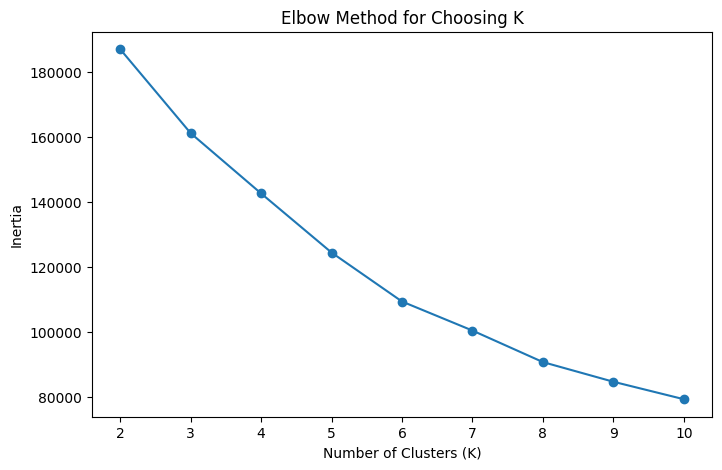

In [201]:
# Plot the Elbow Method
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Choosing K')
plt.show()


In [237]:
# Choix du K optimal basé sur l'inertie
optimal_k = 3  # À ajuster après analyse du coude

# Appliquer K-Means avec le K optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(data_clustering)
data_clustering['cluster'] = kmeans.labels_

# Calculer le score de silhouette pour validation
silhouette_avg = silhouette_score(data_clustering, kmeans.labels_)

C:\Users\33615\AppData\Local\Temp\ipykernel_6316\727384551.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clustering['cluster'] = kmeans.labels_


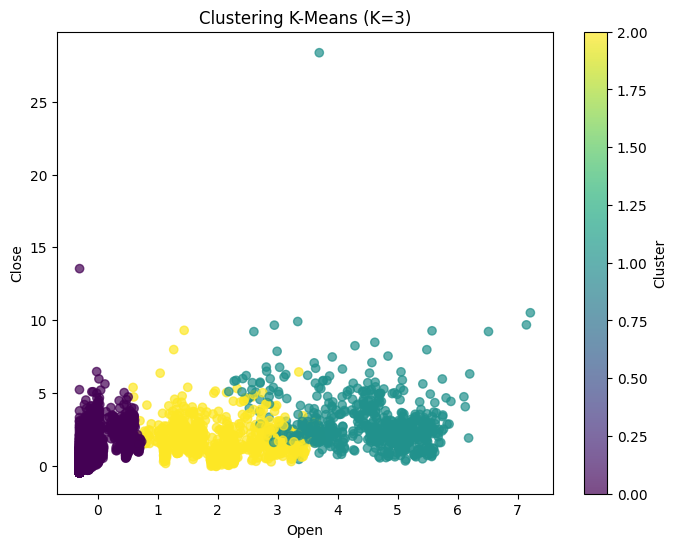

In [203]:
# Tracer les résultats du clustering
plt.figure(figsize=(8, 6))
plt.scatter(data_clustering['Open'], data_clustering['Volume'], c=data_clustering['cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Open')
plt.ylabel('Close')
plt.title(f'Clustering K-Means (K={optimal_k})')
plt.colorbar(label='Cluster')
plt.show()

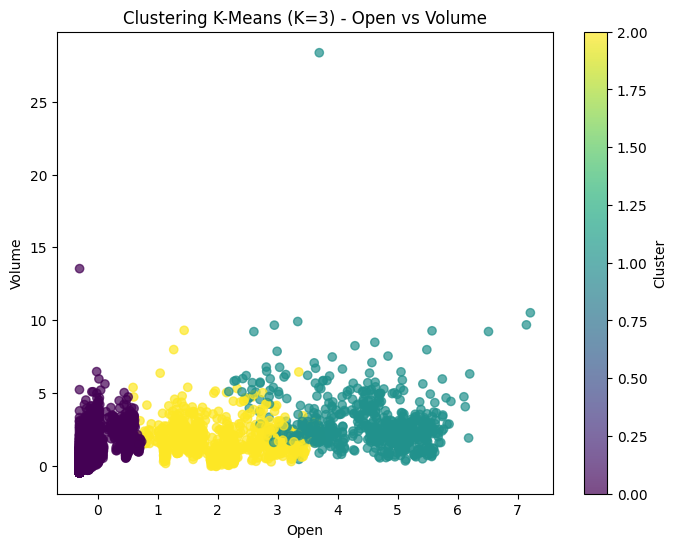

In [204]:
plt.figure(figsize=(8, 6))
plt.scatter(data_clustering['Open'], data_clustering['Volume'], c=data_clustering['cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Open')
plt.ylabel('Volume')
plt.title(f'Clustering K-Means (K={optimal_k}) - Open vs Volume')
plt.colorbar(label='Cluster')
plt.show()

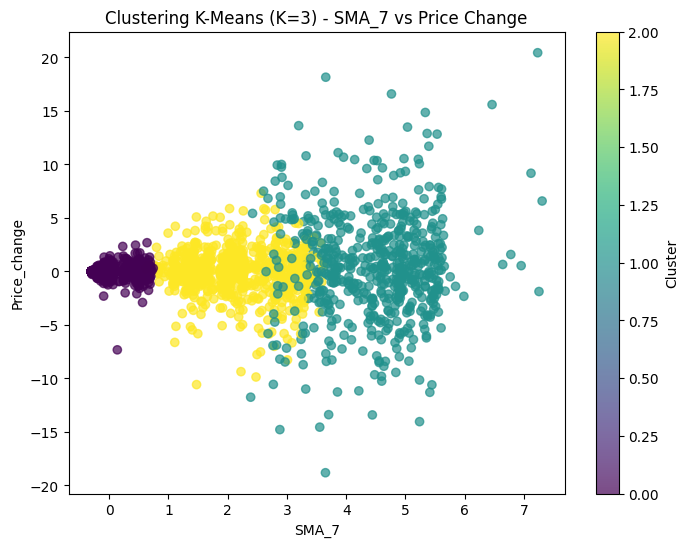

In [205]:
# Examiner si la moyenne mobile à court terme (SMA_7) a une influence sur le changement de prix

plt.figure(figsize=(8, 6))
plt.scatter(data_clustering['SMA_7'], data_clustering['Price_change'], c=data_clustering['cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('SMA_7')
plt.ylabel('Price_change')
plt.title(f'Clustering K-Means (K={optimal_k}) - SMA_7 vs Price Change')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
merged_df['SMA_7'] = merged_df['Close'].rolling(window=7).mean()
merged_df['SMA_50'] = merged_df['Close'].rolling(window=50).mean()

# Modélisation

In [156]:
merged_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Crypto',
       'Volatility', 'Return', 'Amplitude', 'Price_change', 'Volatility_ratio',
       'High_low_spread', 'SMA_7', 'SMA_50', 'EMA_10', 'EMA_50', 'RoC',
       'BB_upper', 'BB_lower', 'ATR', 'RSI', 'VWAP', 'OBV'],
      dtype='object')

### Corrélation

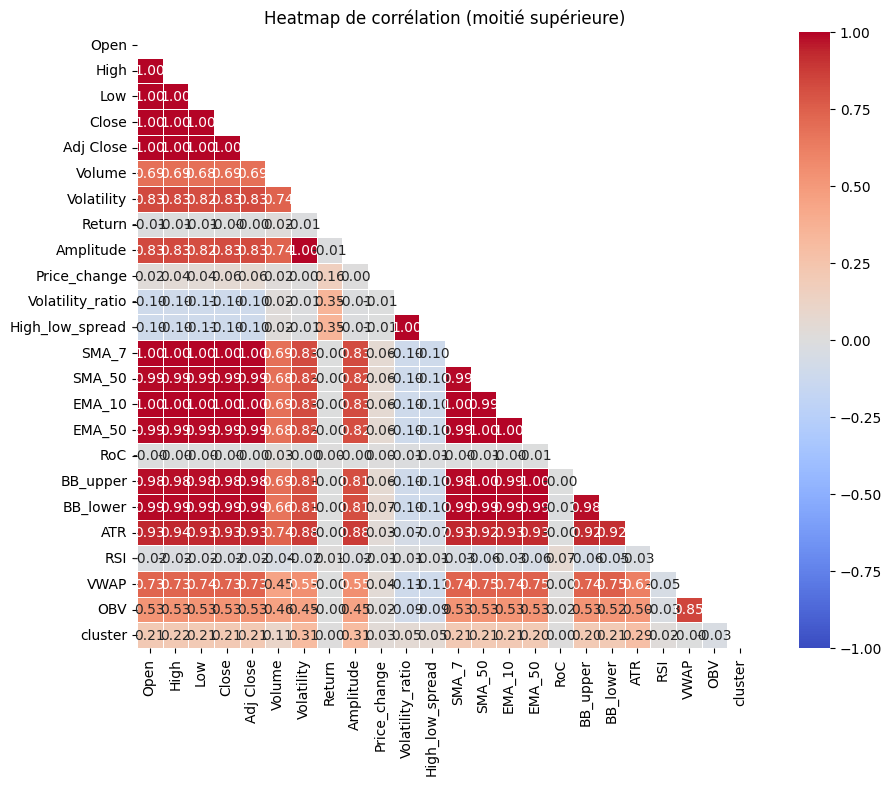

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calcul de la matrice de corrélation
corr_matrix = data_clustering.corr()

# Création du masque pour cacher la moitié inférieure
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Affichage de la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', 
    linewidths=0.5, vmax=1, vmin=-1, square=True
)
plt.title("Heatmap de corrélation (moitié supérieure)")
plt.show()


C:\Users\33615\AppData\Local\Temp\ipykernel_6316\863634746.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_return.index, y=corr_with_return.values, palette="coolwarm")


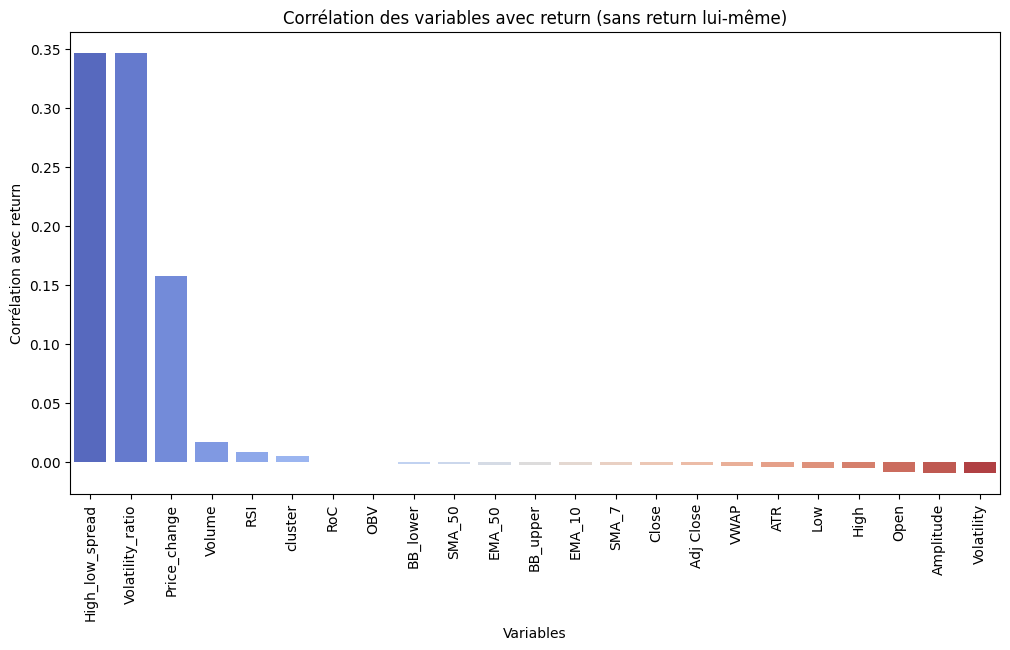

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul des corrélations avec 'return' et suppression de 'return' lui-même
corr_with_return = data_clustering.corr()['Return'].drop('Return').sort_values(ascending=False)

# Tracé du barplot
plt.figure(figsize=(12, 6))
sns.barplot(x=corr_with_return.index, y=corr_with_return.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Variables")
plt.ylabel("Corrélation avec return")
plt.title("Corrélation des variables avec return (sans return lui-même)")
plt.show()


Xgboost

In [192]:
merged_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Crypto',
       'Volatility', 'Return', 'Amplitude', 'Price_change', 'Volatility_ratio',
       'High_low_spread', 'SMA_7', 'SMA_50', 'EMA_10', 'EMA_50', 'RoC',
       'BB_upper', 'BB_lower', 'ATR', 'RSI', 'VWAP', 'OBV'],
      dtype='object')

In [162]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Charger les données
df = merged_df.copy()

# Sélection des variables
features = ['Date', 'Open', 'Volume', 'Volatility', 'Amplitude', 'Price_change', 'Volatility_ratio',
            'High_low_spread', 'RoC', 'ATR', 'RSI', 'VWAP', 'OBV']

target_rendement = 'Return'  # Objectif principal : prédiction des rendements

# Séparation en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df[target_rendement], test_size=0.2, random_state=42)

# Définition du modèle XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    n_estimators=1000,     # Nombre d'arbres (ajustable)
    learning_rate=0.05,    # Taux d'apprentissage
    max_depth=6,           # Profondeur maximale des arbres
    objective='reg:squarederror',  # Fonction de perte pour régression
    eval_metric='rmse',    # RMSE comme métrique d’évaluation
    random_state=42,
    early_stopping_rounds=50  # Arrêt anticipé si pas d'amélioration après 50 itérations
)

# Entraînement du modèle
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=200)

# Prédictions sur l'ensemble de train et de test
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Fonction d'évaluation du modèle
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    return mse, mae, rmse, r2

# Évaluation sur l'ensemble d'entraînement (train)
mse_train, mae_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)

# Évaluation sur l'ensemble de test
mse_test, mae_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)

# Affichage des résultats
print("\n🔹 Scores sur l'ensemble de validation (train) :")
print(f"   - MSE : {mse_train:.6f}")
print(f"   - MAE : {mae_train:.6f}")
print(f"   - RMSE : {rmse_train:.6f}")
print(f"   - R² Score : {r2_train:.6f}\n")

print("🔹 Scores sur l'ensemble de test :")
print(f"   - MSE : {mse_test:.6f}")
print(f"   - MAE : {mae_test:.6f}")
print(f"   - RMSE : {rmse_test:.6f}")
print(f"   - R² Score : {r2_test:.6f}\n")

# Vérification de l'overfitting
difference_mse = abs(mse_train - mse_test)
difference_mae = abs(mae_train - mae_test)
difference_rmse = abs(rmse_train - rmse_test)
difference_r2 = abs(r2_train - r2_test)

print("🔎 Vérification de l'overfitting (différences entre train et test) :")
print(f"   - Différence MSE : {difference_mse:.6f}")
print(f"   - Différence MAE : {difference_mae:.6f}")
print(f"   - Différence RMSE : {difference_rmse:.6f}")
print(f"   - Différence R² Score : {difference_r2:.6f}")

# Analyse :
if difference_mse > 0.1 or difference_r2 > 0.1:
    print("\n⚠ POSSIBLE OVERFITTING : L'écart entre les performances sur train et test est élevé.")
else:
    print("\n✅ Modèle bien généralisé : Les scores train et test sont proches.")

[0]	validation_0-rmse:0.96516
[78]	validation_0-rmse:0.57301

🔹 Scores sur l'ensemble de validation (train) :
   - MSE : 0.178984
   - MAE : 0.227856
   - RMSE : 0.423065
   - R² Score : 0.820508

🔹 Scores sur l'ensemble de test :
   - MSE : 0.272683
   - MAE : 0.252431
   - RMSE : 0.522190
   - R² Score : 0.730247

🔎 Vérification de l'overfitting (différences entre train et test) :
   - Différence MSE : 0.093699
   - Différence MAE : 0.024575
   - Différence RMSE : 0.099126
   - Différence R² Score : 0.090261

✅ Modèle bien généralisé : Les scores train et test sont proches.


RF

In [174]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from pyswarm import pso  # Optimisation PSO

df = merged_df.copy()

# Sélection des Features et Target
features = ['Open', 'Volume', 'Volatility', 'Amplitude', 'Price_change', 'Volatility_ratio',
            'High_low_spread', 'RoC', 'ATR', 'RSI', 'VWAP', 'OBV']

target_rendement = 'Return'

X = df[features].values
y = df[target_rendement].values  # Target principale

# Split temporel (5-fold TimeSeriesSplit)
tscv = TimeSeriesSplit(n_splits=5)
rf_rmse_scores = []
rf_r2_scores = []
rf_mae_scores = []
rf_explained_var_scores = []

# Boucle de validation croisée
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Modèle Random Forest (baseline)
    rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
    
    # Entraînement Random Forest
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)

    # Calcul des métriques
    rf_rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred_rf)))
    rf_r2_scores.append(r2_score(y_test, y_pred_rf))
    rf_mae_scores.append(mean_absolute_error(y_test, y_pred_rf))
    rf_explained_var_scores.append(explained_variance_score(y_test, y_pred_rf))

print(f"Random Forest RMSE moyen : {np.mean(rf_rmse_scores):.6f}")
print(f"Random Forest R² Score moyen : {np.mean(rf_r2_scores):.6f}")
print(f"Random Forest MAE moyen : {np.mean(rf_mae_scores):.6f}")
print(f"Random Forest Explained Variance moyen : {np.mean(rf_explained_var_scores):.6f}")

# ---------------------------------------------------------------
# Optimisation du Random Forest avec PSO
# ---------------------------------------------------------------

def evaluate_rf(hyperparams):
    """
    Fonction d'évaluation du modèle Random Forest pour l'optimisation PSO.
    """
    n_estimators, max_depth = int(hyperparams[0]), int(hyperparams[1])

    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42, n_jobs=-1)

    # Entraînement rapide pour l'optimisation
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return mean_squared_error(y_test, y_pred)

# Bornes pour l'optimisation PSO
lb = [50, 5]   # n_estimators, max_depth
ub = [300, 30]

# Exécution de l'optimisation
best_hyperparams, _ = pso(evaluate_rf, lb, ub, swarmsize=10, maxiter=5)

# Meilleurs paramètres trouvés
n_estimators_opt, max_depth_opt = int(best_hyperparams[0]), int(best_hyperparams[1])

print("Meilleurs hyperparamètres Random Forest trouvés par PSO:")
print(f"   - n_estimators: {n_estimators_opt}")
print(f"   - max_depth: {max_depth_opt}")

# ---------------------------------------------------------------
# Réentraînement du Random Forest avec les meilleurs hyperparamètres
# ---------------------------------------------------------------

optimized_rf = RandomForestRegressor(n_estimators=n_estimators_opt, max_depth=max_depth_opt, random_state=42, n_jobs=-1)

# Entraînement final
optimized_rf.fit(X_train, y_train)

# Prédictions finales
y_train_pred = optimized_rf.predict(X_train)
y_test_pred = optimized_rf.predict(X_test)

# Évaluation finale sur train et test
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    explained_var = explained_variance_score(y_true, y_pred)

    return mse, rmse, mae, r2, explained_var

# Calcul des scores sur l'entraînement et le test
mse_train, rmse_train, mae_train, r2_train, explained_var_train = evaluate_model(y_train, y_train_pred)
mse_test, rmse_test, mae_test, r2_test, explained_var_test = evaluate_model(y_test, y_test_pred)

# Affichage des résultats
print("\nScores du Random Forest optimisé :")
print(f"   - MSE Train : {mse_train:.6f} | MSE Test : {mse_test:.6f}")
print(f"   - RMSE Train : {rmse_train:.6f} | RMSE Test : {rmse_test:.6f}")
print(f"   - MAE Train : {mae_train:.6f} | MAE Test : {mae_test:.6f}")
print(f"   - R² Score Train : {r2_train:.6f} | R² Score Test : {r2_test:.6f}")
print(f"   - Explained Variance Train : {explained_var_train:.6f} | Explained Variance Test : {explained_var_test:.6f}")

# Vérification de l'overfitting
difference_mse = abs(mse_train - mse_test)
difference_rmse = abs(rmse_train - rmse_test)
difference_mae = abs(mae_train - mae_test)
difference_r2 = abs(r2_train - r2_test)
difference_explained_var = abs(explained_var_train - explained_var_test)

print("\nVérification de l'overfitting (différences entre train et test) :")
print(f"   - Différence MSE : {difference_mse:.6f}")
print(f"   - Différence RMSE : {difference_rmse:.6f}")
print(f"   - Différence MAE : {difference_mae:.6f}")
print(f"   - Différence R² Score : {difference_r2:.6f}")
print(f"   - Différence Explained Variance : {difference_explained_var:.6f}")

Random Forest RMSE moyen : 0.562291
Random Forest R² Score moyen : 0.715015
Random Forest MAE moyen : 0.231706
Random Forest Explained Variance moyen : 0.715234
Stopping search: maximum iterations reached --> 5
Meilleurs hyperparamètres Random Forest trouvés par PSO:
   - n_estimators: 55
   - max_depth: 23

Scores du Random Forest optimisé :
   - MSE Train : 0.030586 | MSE Test : 0.137267
   - RMSE Train : 0.174889 | RMSE Test : 0.370496
   - MAE Train : 0.039363 | MAE Test : 0.171855
   - R² Score Train : 0.969052 | R² Score Test : 0.870256
   - Explained Variance Train : 0.969052 | Explained Variance Test : 0.870494

Vérification de l'overfitting (différences entre train et test) :
   - Différence MSE : 0.106681
   - Différence RMSE : 0.195606
   - Différence MAE : 0.132492
   - Différence R² Score : 0.098796
   - Différence Explained Variance : 0.098558


In [184]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from pyswarm import pso  # Optimisation PSO
from sklearn.preprocessing import LabelEncoder

df = merged_df.copy()

# Sélection des Features et Target
features = ['Open', 'Volume', 'Volatility', 'Amplitude', 'Price_change', 'Volatility_ratio',
            'High_low_spread', 'RoC', 'ATR', 'RSI', 'VWAP', 'OBV']

target_rendement = 'Return'

X = df[features].values
y = df[target_rendement].values  # Target principale

# Encode 'Crypto' avec LabelEncoder
le = LabelEncoder()
df['Crypto_encoded'] = le.fit_transform(df['Crypto'])

# Split temporel (5-fold TimeSeriesSplit)
tscv = TimeSeriesSplit(n_splits=5)
rf_rmse_scores = []
rf_r2_scores = []
rf_mae_scores = []
rf_explained_var_scores = []

# Boucle de validation croisée
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Modèle Random Forest (baseline)
    rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
    
    # Entraînement Random Forest
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)

    # Calcul des métriques
    rf_rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred_rf)))
    rf_r2_scores.append(r2_score(y_test, y_pred_rf))
    rf_mae_scores.append(mean_absolute_error(y_test, y_pred_rf))
    rf_explained_var_scores.append(explained_variance_score(y_test, y_pred_rf))

print(f"Random Forest RMSE moyen : {np.mean(rf_rmse_scores):.6f}")
print(f"Random Forest R² Score moyen : {np.mean(rf_r2_scores):.6f}")
print(f"Random Forest MAE moyen : {np.mean(rf_mae_scores):.6f}")
print(f"Random Forest Explained Variance moyen : {np.mean(rf_explained_var_scores):.6f}")

# ---------------------------------------------------------------
# Optimisation du Random Forest avec PSO
# ---------------------------------------------------------------

def evaluate_rf(hyperparams):
    """
    Fonction d'évaluation du modèle Random Forest pour l'optimisation PSO.
    """
    n_estimators, max_depth = int(hyperparams[0]), int(hyperparams[1])

    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42, n_jobs=-1)

    # Entraînement rapide pour l'optimisation
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return mean_squared_error(y_test, y_pred)

# Bornes pour l'optimisation PSO
lb = [50, 5]   # n_estimators, max_depth
ub = [300, 30]

# Exécution de l'optimisation
best_hyperparams, _ = pso(evaluate_rf, lb, ub, swarmsize=10, maxiter=5)

# Meilleurs paramètres trouvés
n_estimators_opt, max_depth_opt = int(best_hyperparams[0]), int(best_hyperparams[1])

print("Meilleurs hyperparamètres Random Forest trouvés par PSO:")
print(f"   - n_estimators: {n_estimators_opt}")
print(f"   - max_depth: {max_depth_opt}")

# ---------------------------------------------------------------
# Réentraînement du Random Forest avec les meilleurs hyperparamètres
# ---------------------------------------------------------------

optimized_rf = RandomForestRegressor(n_estimators=n_estimators_opt, max_depth=max_depth_opt, random_state=42, n_jobs=-1)

# Entraînement final
optimized_rf.fit(X_train, y_train)

# Prédictions finales
y_train_pred = optimized_rf.predict(X_train)
y_test_pred = optimized_rf.predict(X_test)

# Évaluation finale sur train et test
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    explained_var = explained_variance_score(y_true, y_pred)

    return mse, rmse, mae, r2, explained_var

# Calcul des scores sur l'entraînement et le test
mse_train, rmse_train, mae_train, r2_train, explained_var_train = evaluate_model(y_train, y_train_pred)
mse_test, rmse_test, mae_test, r2_test, explained_var_test = evaluate_model(y_test, y_test_pred)

# Affichage des résultats
print("\nScores du Random Forest optimisé :")
print(f"   - MSE Train : {mse_train:.6f} | MSE Test : {mse_test:.6f}")
print(f"   - RMSE Train : {rmse_train:.6f} | RMSE Test : {rmse_test:.6f}")
print(f"   - MAE Train : {mae_train:.6f} | MAE Test : {mae_test:.6f}")
print(f"   - R² Score Train : {r2_train:.6f} | R² Score Test : {r2_test:.6f}")
print(f"   - Explained Variance Train : {explained_var_train:.6f} | Explained Variance Test : {explained_var_test:.6f}")

# Vérification de l'overfitting
difference_mse = abs(mse_train - mse_test)
difference_rmse = abs(rmse_train - rmse_test)
difference_mae = abs(mae_train - mae_test)
difference_r2 = abs(r2_train - r2_test)
difference_explained_var = abs(explained_var_train - explained_var_test)

print("\nVérification de l'overfitting (différences entre train et test) :")
print(f"   - Différence MSE : {difference_mse:.6f}")
print(f"   - Différence RMSE : {difference_rmse:.6f}")
print(f"   - Différence MAE : {difference_mae:.6f}")
print(f"   - Différence R² Score : {difference_r2:.6f}")
print(f"   - Différence Explained Variance : {difference_explained_var:.6f}")

# ---------------------------------------------------------------
# Ajout de la prédiction dans le dataframe
# ---------------------------------------------------------------

# Prédictions finales sur l'ensemble du dataset
df['returns_RF'] = optimized_rf.predict(df[features])

# Téléchargement du dataset en CSV
output_path = 'dataset_with_returns_RF.csv'
df.to_csv(output_path, index=False)

print(f"Dataset avec la colonne 'returns_RF' a été sauvegardé sous {output_path}")


Random Forest RMSE moyen : 0.562291
Random Forest R² Score moyen : 0.715015
Random Forest MAE moyen : 0.231706
Random Forest Explained Variance moyen : 0.715234
Stopping search: maximum iterations reached --> 5
Meilleurs hyperparamètres Random Forest trouvés par PSO:
   - n_estimators: 289
   - max_depth: 23

Scores du Random Forest optimisé :
   - MSE Train : 0.028580 | MSE Test : 0.141756
   - RMSE Train : 0.169055 | RMSE Test : 0.376505
   - MAE Train : 0.037893 | MAE Test : 0.170190
   - R² Score Train : 0.971083 | R² Score Test : 0.866013
   - Explained Variance Train : 0.971083 | Explained Variance Test : 0.866308

Vérification de l'overfitting (différences entre train et test) :
   - Différence MSE : 0.113176
   - Différence RMSE : 0.207450
   - Différence MAE : 0.132298
   - Différence R² Score : 0.105069
   - Différence Explained Variance : 0.104775


C:\Users\33615\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Dataset avec la colonne 'returns_RF' a été sauvegardé sous dataset_with_returns_RF.csv


In [187]:
returns_RF = pd.read_csv("dataset_with_returns_RF.csv")

In [188]:
returns_RF.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Crypto',
       'Volatility', 'Return', 'Amplitude', 'Price_change', 'Volatility_ratio',
       'High_low_spread', 'SMA_7', 'SMA_50', 'EMA_10', 'EMA_50', 'RoC',
       'BB_upper', 'BB_lower', 'ATR', 'RSI', 'VWAP', 'OBV', 'Crypto_encoded',
       'returns_RF'],
      dtype='object')

# Graphique

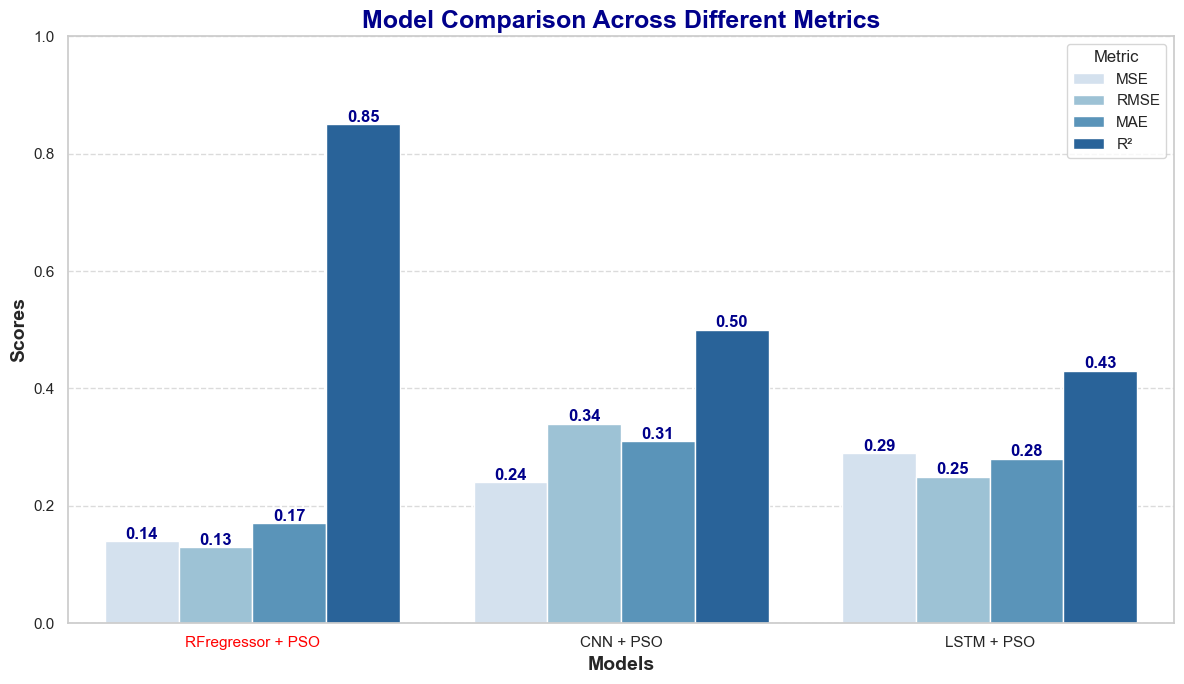

In [233]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Enter the values for each model and each metric
data = {
    'Model': ['RFregressor + PSO', 'CNN + PSO', 'LSTM + PSO'],
    'MSE': [0.14, 0.24, 0.29],
    'RMSE': [0.13, 0.34, 0.25],
    'MAE': [0.17, 0.31, 0.28],
    'R²': [0.85, 0.5, 0.43]
}

# Create the DataFrame
df_results = pd.DataFrame(data)

# Transform the data to "long" format for seaborn
df_long = pd.melt(df_results, id_vars=["Model"], value_vars=["MSE", "RMSE", "MAE", "R²"], 
                  var_name="Metric", value_name="Score")

# Plot with seaborn
plt.figure(figsize=(12, 7))
sns.set(style="whitegrid")

# Create the barplot with a more aesthetic palette in blue tones
ax = sns.barplot(x="Model", y="Score", hue="Metric", data=df_long, palette="Blues")

# Customizing the graph
plt.title("Model Comparison Across Different Metrics", fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel("Models", fontsize=14, fontweight='bold')
plt.ylabel("Scores", fontsize=14, fontweight='bold')
plt.ylim(0, 1)  # Limit the Y-axis to 1

# Add a light grid for improved readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the score on top of each bar (only if the score is greater than 0.01)
for p in ax.patches:
    score = p.get_height()
    if score > 0.01:  # Only display if score is greater than 0.01
        ax.annotate(f'{score:.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=12, fontweight='bold', color='darkblue', 
                    xytext=(0, 5), textcoords='offset points')

# Change color of 'RF + PSO' label to red
for label in ax.get_xticklabels():
    if label.get_text() == 'RFregressor + PSO':
        label.set_color('red')

# Display the plot
plt.tight_layout()
plt.show()


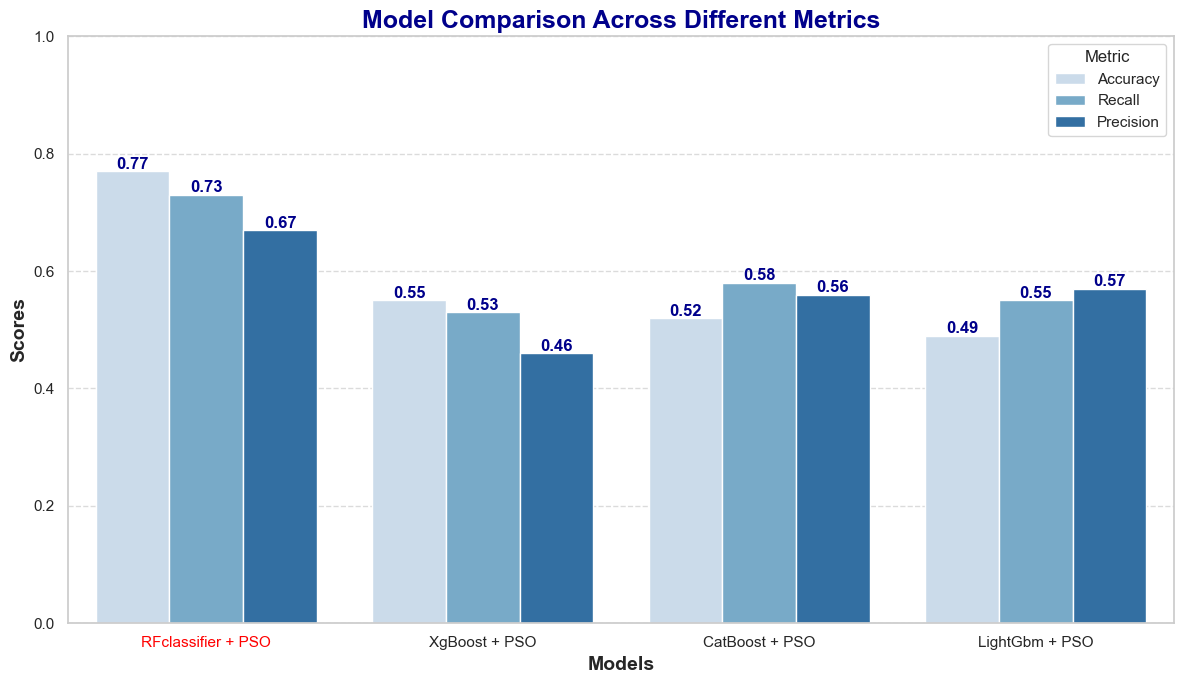

In [236]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Enter the values for each model and each metric
data = {
    'Model': ['RFclassifier + PSO','XgBoost + PSO', 'CatBoost + PSO', 'LightGbm + PSO'],
    'Accuracy': [0.77, 0.55, 0.52, 0.49],
    'Recall': [0.73, 0.53, 0.58, 0.55],
    'Precision': [0.67, 0.46, 0.56, 0.57],
}

# Create the DataFrame
df_results = pd.DataFrame(data)

# Transform the data to "long" format for seaborn
df_long = pd.melt(df_results, id_vars=["Model"], value_vars=["Accuracy", "Recall", "Precision"], 
                  var_name="Metric", value_name="Score")

# Plot with seaborn
plt.figure(figsize=(12, 7))
sns.set(style="whitegrid")

# Create the barplot with a more aesthetic palette in blue tones
ax = sns.barplot(x="Model", y="Score", hue="Metric", data=df_long, palette="Blues")

# Customizing the graph
plt.title("Model Comparison Across Different Metrics", fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel("Models", fontsize=14, fontweight='bold')
plt.ylabel("Scores", fontsize=14, fontweight='bold')
plt.ylim(0, 1)  # Limit the Y-axis to 1

# Add a light grid for improved readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the score on top of each bar (only if the score is greater than 0.01)
for p in ax.patches:
    score = p.get_height()
    if score > 0.01:  # Only display if score is greater than 0.01
        ax.annotate(f'{score:.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=12, fontweight='bold', color='darkblue', 
                    xytext=(0, 5), textcoords='offset points')

# Change color of 'RF + PSO' label to red
for label in ax.get_xticklabels():
    if label.get_text() == 'RFclassifier + PSO':
        label.set_color('red')

# Display the plot
plt.tight_layout()
plt.show()
